In [ ]:
!apt update && apt install cuda-11-8

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [773 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,624 kB]
Get:13 http://archive.ubuntu.com/ubuntu

In [ ]:
if tf.test.is_gpu_available():
    print("CUDA est disponible sur ce système.")
    physical_devices = tf.config.list_physical_devices('GPU')
    print("Nombre de GPU disponibles :", len(physical_devices))
    for gpu in physical_devices:
        print("Nom du GPU :", gpu.name)
else:
    print("CUDA n'est pas disponible sur ce système.")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


CUDA est disponible sur ce système.
Nombre de GPU disponibles : 1
Nom du GPU : /physical_device:GPU:0


In [ ]:
import sys
import numpy as np

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [ ]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    %pip install -q swig
    %pip install -q -U gym
    %pip install -q -U gym[classic_control,box2d,atari,accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build whe

In [ ]:
from packaging import version
import tensorflow as tf

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "rl"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import gym

env = gym.make("LunarLander-v2", render_mode="rgb_array")

In [ ]:
obs, info = env.reset(seed=42)
obs

array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

In [ ]:
obs.shape

(8,)

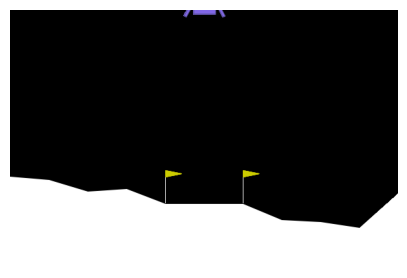

In [ ]:
# extra code – creates a little function to render and plot an environment

def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

In [ ]:
action = 2  # accelerate right
obs, reward, done, truncated, info = env.step(action)
obs

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


array([ 0.00443649,  1.4258697 ,  0.21735111,  0.34394354, -0.00602619,
       -0.06743145,  0.        ,  0.        ], dtype=float32)

In [ ]:
# extra code – this cell displays an animation of one episode

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("LunarLander-v2", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)

In [ ]:
# extra code – a function that creates an animation for a given policy model
import numpy as np
def pg_policy(obs):
  action_probabilities = model.predict(obs[np.newaxis], verbose=0)
  print(action_probabilities)
  max_proba = tf.reduce_max(action_probabilities, axis=1)
  explore = (tf.random.uniform([1, 1]) > max_proba)
  if explore:
    action = np.random.randint(0, 4)
  else:
    action = tf.argmax(action_probabilities[0]).numpy()
  return action

np.random.seed(42)

In [ ]:
def play_one_step(env, obs, model, loss_fn):
  with tf.device('/GPU:0'):
    with tf.GradientTape() as tape:
        action_probabilities = model(obs[np.newaxis])
        max_proba = tf.reduce_max(action_probabilities, axis=1)
        explore = (tf.random.uniform([1, 1]) > max_proba)
        if explore:
            action = np.random.randint(0, 4)
        else:
            action = tf.argmax(action_probabilities[0]).numpy()
        y_target = tf.one_hot(action, depth=4, dtype=tf.float32)
        y_target = tf.reshape(y_target, shape=(1, 4))
        loss = loss_fn(y_target, action_probabilities)

    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, truncated, info = env.step(action)
    return obs, reward, done, truncated, grads

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
  with tf.device('/GPU:0'):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, truncated, grads = play_one_step(
                env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done or truncated:
                break

        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    return all_rewards, all_grads

In [ ]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax"),
])

obs, info = env.reset(seed=42)

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
for iteration in range(n_iterations):
  with tf.device('/GPU:0'):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)

    # extra code – displays some debug info during training
    total_rewards = sum(map(sum, all_rewards))
    print(f"\rIteration: {iteration + 1}/{n_iterations},"
          f" mean rewards: {total_rewards / n_episodes_per_update:.1f}", end="")

    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_factor)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Iteration: 1/150, mean rewards: -258.8

Iteration: 5/150, mean rewards: -290.6

KeyboardInterrupt: 

In [ ]:
# extra code – displays the animation
np.random.seed(42)
show_one_episode(pg_policy)

[[1.0000000e+00 3.0536275e-13 0.0000000e+00 0.0000000e+00]]
[[1.000000e+00 2.749687e-13 0.000000e+00 0.000000e+00]]
[[1.0000000e+00 2.5047266e-13 0.0000000e+00 0.0000000e+00]]
[[1.000000e+00 2.303522e-13 0.000000e+00 0.000000e+00]]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[1.0000000e+00 2.1388785e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 2.0050945e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.8977192e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.8133325e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.7493816e-13 0.0000000e+00 0.0000000e+00]]
[[1.000000e+00 1.703884e-13 0.000000e+00 0.000000e+00]]
[[1.0000000e+00 1.6755236e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.6633982e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.6673114e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.6872483e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.7238375e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.7781509e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.8517513e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 1.9469363e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 2.0668183e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 2.2150053e-13 0.0000000e+00 0.0000000e+00]]
[[1.0000000e+00 2.3966368e-13 0.0000000e+00 

KeyboardInterrupt: 